# Arbres de décision

Les arbres de décision réalisent la classification d'un objet par une suite de tests sur les attributs qui le décrivent.  Ces tests sont organisés de telle sorte que la réponse à l'un d'eux indique le prochain test auquel on doit soumettre cet objet, structurant les tests en arbre. La classification s'effectue donc en partant de la racine pour poursuivre récursivement le processus jusqu'à ce qu'on rencontre une feuille. 

## Cas binaire

On dispose d'un ensemble d'apprentissage 
$Z=\left \{(\mathbf x_j, y_j),1\leq j\leq n, \mathbf x_i\in X,y_i\in {\cal C} \right \}$, avec $\vert X\vert = d$.

### Construction d'un arbre

On cherche d'abord, en appliquant le principe de minimisation du risque empirique, à construire un arbre de classification ({prf:ref}`tree-algorithm`) dont l'erreur apparente est nulle.  On suppose pour l'instant que les attributs (les composantes de $\mathbf x$) sont à valeur binaire.


```{prf:algorithm} Arbre(noeud X)
:label: tree-algorithm
**Entrée** : l'ensemble d'apprentissage $Z$

**Sortie** : l'arbre de décision

Si Tous les points de $X$ appartiennent à la même classe

  1. Créer une feuille portant le nom de cette classe

Sinon

  1. Choisir le meilleur attribut pour créer un noeud
  2. Le test associé à ce noeud sépare $X$ en  $X_g$ et $X_d$
  3. Arbre($X_g$)
  4. Arbre($X_d$)
```

### Inteprétation probabiliste

Pour pouvoir choisir le meilleur attribut, on se place dans un cadre probabiliste : lors de la récursion, on arrive sur un noeud auquel sont attachés $n$ points de $Z$, répartis en $C$ classes $y_j$ comportant chacune $n_j$ points.

Un attribut binaire $a$ partage chaque sous-ensemble $n_j$ en deux parties, comportant respectivement $l_j$ ($a$=VRAI) et $r_j$ ($a$=FAUX) points. 

Si $l=\displaystyle\sum_{j=1}^{C}l_j \;\;\;\mbox{et} \;\;\; r=\displaystyle\sum_{j=1}^{C}r_j$, on peut considérer que les $n$ points d'apprentissage sont des tirages aléatoires selon deux distributions discrètes possibles : celle des $C$ valeurs que prend la valeur $y_j$ de la classe et celle des deux valeurs de $a$. Alors :

- $l_j/n$ et $r_j/n$ sont des estimations de  $P(a=VRAI, y=y_j)$ et $P(a=FAUX, y=y_j)$.
- $l/n$ et $r/n$ sont des estimations de  $P(a=VRAI)$ et $P(a=FAUX)$.
- $n_j/n$ est une estimation de $P(y=y_j)$.

### Choix de l'attribut

L'information mutuelle permet de mesurer l'homogénéité entre deux distributions : Si ${\cal D}_y$ (respectivement ${\cal D}_{a}$) est l'ensemble des valeurs que peut prendre $y$ (resp. $a$), alors 

   $I(y,a) = \sum_{u,v \in {\cal D}_y \times {\cal D}_a} P(y =u,a=v)log\frac{P(y =u,a=v)}{P(y =u)P(a=v)}$

L'information mutuelle $I(y,a)$ :

-  atteint un minimum lorsque $P(y =u,a=v)=P(\omega =u)P(a=v)$ sur tout  ${\cal D}_y \times {\cal D}_a$, soit quand les deux distributions sont indépendantes. 
-  atteint un maximum lorsque pour tout $u_i\in{\cal D}_y$ il existe un unique $v_j\in{\cal D}_a$ tel que  $P(y =u_i)=P(a=v_j)$.



On a (théorie de l'information) 

$$(y,a) = H(y) - H(y | a)$$

avec l'entropie  de $y$ définie par 

$$H(y) = -\displaystyle\sum_{u \in {\cal D}_y}P(y =u)log (P(y =u))$$

et l'entropie de $y$ conditionnée par $a$ :

$$H(y| a) = -\displaystyle\sum_{u,v \in {\cal D}_y \times {\cal D}_a} P(y =u,a=v)log (P(y =u | a=v))$$

Ici, $a$ est un attribut binaire, donc ${\cal D}_a =\{VRAI, FAUX\}$ et $y$ représente la distribution des données sur les $C$ classes. Ainsi $H(y | a)$ et $I(y,a)$ peuvent  s'estimer par :

${\widehat I(\omega,{\boldsymbol a})} = - \sum_{j=1}^{C}
\frac{l_j}{n}\log\frac{l_j/n}{(l/n) \times (n_j/n)} +
\frac{r_j}{n}\log\frac{r_j/n}{(r/n) \times (n_j/n)}\quad \textrm{et}\quad 
{\widehat I(\omega)} = - \sum_{j=1}^{C} \frac{n_j}{n} \log \frac{n_j}{n}$
En notant  $J(a=VRAI)= \displaystyle\sum_{j=1}^{C}
\frac{l_j}{l}\log\frac{l_j}{l} \;\;\;\;\;\mbox{et}\;\;\;\;\;
J(a=FAUX)= \displaystyle\sum_{j=1}^{C} \frac{r_j}{r}\log\frac{r_j}{r}$

on a 
 
${\widehat H(y\mid a)} = \frac{l}{n} J(a=VRAI) + \frac{r}{n} J(a=FAUX)$

Pour construire un noeud dans l'arbre, une idée naturelle est donc de chercher parmi les $d$ attributs celui qui possède la plus grande corrélation avec la répartition en classes, autrement dit celui qui a la meilleure information mutuelle avec la distribution des points d'apprentissage sur les classes. Autrement dit, il faut résoudre le problème 

$i^{*} = \underset{i\in[\![1,d]\!] }{\mbox{ArgMin}} \ \ {\widehat H(y \mid a_i)}$



### Autres critères de choix

D'autres critères de choix sont possibles, parmi lesquels :

-  Métrique de Gini : $Gini(y \mid a) = \frac{l}{n} \displaystyle\sum_{j=1}^C  \frac{l_j}{n_j}(1-\frac{l_j}{n_j} + \frac{r}{n} \displaystyle\sum_{j=1}^C \frac{r_j}{n_j}(1-\frac{r_j}{n_j})$
-  critère du $\chi^2$ : $\chi^2(c \mid a) = \displaystyle\sum_{j=1}^C (\frac{l_j-(l n_j / n)}{\sqrt{ln_j /n}})^2 +(\frac{r_j-(r n_j / n)}{\sqrt{r n_j /n}})^2$



## Cas non binaire
Dans le cas où les attributs sont à valeurs discrètes, on est facilement ramené au cas binaire. Dans le cas d'un attribut à valeurs continues,  le nombre de données
d'apprentissage étant fini, le nombre des valeurs que prend cet attribut sur les
exemples est aussi fini.  Le choix se résume donc à comparer les valeurs
à un seuil pour construire un noeud binaire : on trie les points d'apprentissage selon la valeur de cet attribut, puis on cherche le
seuil $s(a)$ qui minimise l'un des critères présentés. 





## Exemple : l'algorithme ID3
Plusieurs algorithmes sont disponibles, ainsi que plusieurs mesures d'homogénéité. Nous décrivons ici l'algorithme Iterative Dichotomiser 3 (ID3). Pour illustrer la construction de l'arbre, on se place dans le cadre d'un problème de classification à $C$ classes d'objets à $d$ attributs, où  chaque attribut prend un nombre fini de valeurs. L'({prf:ref}`id3-algorithm`) décrit le principe général de l'algorithme ID3, que nous détaillons dans la suite.



```{prf:algorithm} ID3
:label: id3-algorithm
**Entrée** : $Z=\left \{(\boldsymbol x_i,y_i),i\in[\![1,n]\!],y_i \in[\![1,C]\!] \right \}$

**Sortie** : l'arbre de décision

Fonction ID3($Z$)
Si $\forall\ i\in [\![1,n]\!]\ y_i=\tilde{y}$=constante

  1. Retourner un arbre à un noeud contenant $\tilde{y}$

Sinon

  1. Soit $k\in[\![1,d]\!]$ l'attribut de plus grand gain $G(Z,k)$.
  2. $\{k_1\cdots k_m\}$ : valeurs possibles de l'attribut $k$.
  3. $\{Z_1\cdots Z_m\}$ : sous-ensembles des objets de $Z$ possédant la valeur $k_1\cdots k_m$ pour l'attribut $k$.
  4. Construire l'arbre de racine $k$ et de sous-arbres ID3($Z_i$),$i\in[\![1,m]\!]$, reliés à $k$ par un arc étiqueté par $k_i,\ i\in[\![1,m]\!]$.
```

## Elagage d'arbres

Il n'est souvent pas nécessaire de développer l'arbre jusqu'au bout, ceci entraînant des risques de sur-apprentissage. A l'inverse, le cas limite de l'arbre constant introduit un sous-apprentissage évident. On est donc amené à se doter de techniques d'élagage (pruning) d'arbres de décision.

Il existe une théorie élégante pour trouver l'rbre optimal, minimisant l'erreur de prédiction (en classification ou régression) pénalisée par la complexité de l'arbre (mesurée par le nombre de feuilles).

Soit donc $T$ un abre de complexité son nombre de feuilles $|T|$. On définit l'erreur d'ajustement de $T$ par 

$$D(T) = \displaystyle\sum_{i=1}^{|T|}D_i$$

où $D_i$ estl' hétérogeneité de la feuille $i$.

L'erreur d'ajustement pénalisée par la complexité est donc 


$$\mathcal{C}_\gamma(T)= D(T)+\gamma |T|$$

Alors : 
- $\gamma=0$: l'arbre maximal $T_{max}$ minimise $\mathcal{C}_\gamma(T)$
- lorsque $\gamma \nearrow$ la division pour laquelle l'amélioration de $D$ est inférieure à $\gamma$ est annulée et on construit un nouvel arbre en fusionnant deux feuilles. 

On construit donc une suite d'arbres  $T_{max}\supset T_1\supset T_2\cdots T_K$ appelée suite de Breiman.

L'arbre optimal est alors construit en appliquant l ({prf:ref}`Breiman`) 



```{prf:algorithm} ArbreOptimal
:label: Breiman
**Entrée** : l'ensemble d'apprentissage $Z$

**Sortie** : l'arbre de décision optimal

Si Tous les points de $X$ appartiennent à la même classe

  1. Calculer $T_{max}$
  2. Calculer la suite de Breiman $T_1\supset T_2\cdots T_K$ associée à la suite de paramètres $\gamma_1, \cdots \gamma_K$
  3. Pour $v=1$ à $V$ (erreur de validation V-fold)
      1. Pour chaque ensemble de $V-1$ folds, estimer la suite des arbres associés à $\gamma_1, \cdots \gamma_K$
      2. Estimer l'erreur sur le fold
  4. Pour chaque $\gamma_1, \cdots \gamma_K$ calculer la moyenne des erreurs.
  5. Déterminer la valeur optimale $\gamma_{opt}$ minimisant l'erreur moyenne.
  6. Retenir l'arbre correspondant à $\gamma_{opt}$ dans $T_1\supset T_2\cdots T_K$
```

Pour calculer l'élagage optimal, `Scikit-learn` propose la fonction `cost_complexity_pruning_path`.

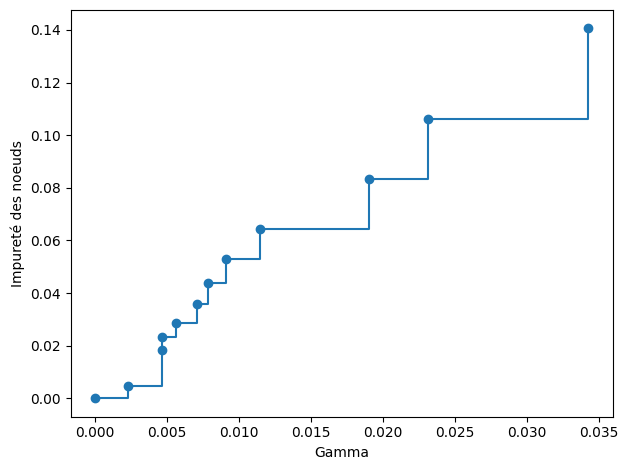

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

arbre = DecisionTreeClassifier(random_state=0)
path = arbre.cost_complexity_pruning_path(X_train, y_train)
ccp_gammas, impuretes = path.ccp_alphas, path.impurities


fig, ax = plt.subplots()
# On retire la valeur maximum de gamma, c'est l'arbre 
# à un seul noeud comportant tout Z
ax.plot(ccp_gammas[:-1], impuretes[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("Gamma")
ax.set_ylabel("Impureté des noeuds")
plt.tight_layout()

On entraîne un arbre de décision avec les valeurs de $\gamma$.

In [2]:
arbres = []
for ccp_gamma in ccp_gammas:
    arbre = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_gamma)
    arbre.fit(X_train, y_train)
    arbres.append(arbre)
print("Nombre de noeuds dans le dernier arbre (gamma={}) : {}".format(ccp_gammas[-1],arbres[-1].tree_.node_count)
)

Nombre de noeuds dans le dernier arbre (gamma=0.3272984419327777) : 1


Le nombre de noeuds et la profondeur de l'arbre décroît effectivement bien lorsque $\gamma$ augmente.

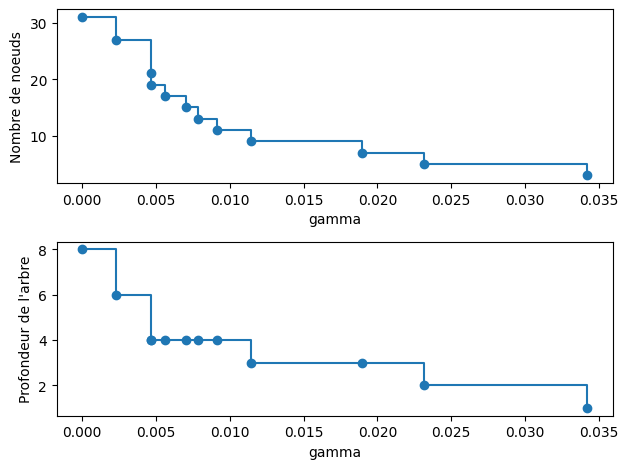

In [3]:
arbres = arbres[:-1]
ccp_gammas = ccp_gammas[:-1]

node_counts = [arbre.tree_.node_count for arbre in arbres]
depth = [arbre.tree_.max_depth for arbre in arbres]
figure, axs = plt.subplots(2, 1)
axs[0].plot(ccp_gammas, node_counts, marker="o", drawstyle="steps-post")
axs[0].set_xlabel("gamma")
axs[0].set_ylabel("Nombre de noeuds")
axs[1].plot(ccp_gammas, depth, marker="o", drawstyle="steps-post")
axs[1].set_xlabel("gamma")
axs[1].set_ylabel("Profondeur de l'arbre")
figure.tight_layout()

En calculant les précisions sur l'ensemle de test, on voit que l'arbre construit pour $\gamma=0.015$ amène au meilleur résultat.

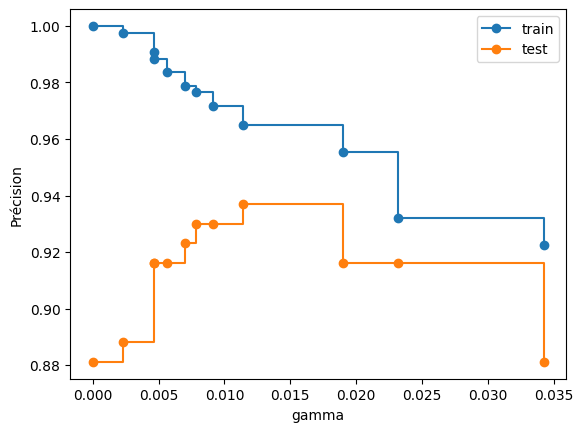

In [4]:
train_scores = [arbre.score(X_train, y_train) for arbre in arbres]
test_scores = [arbre.score(X_test, y_test) for arbre in arbres]

fig, ax = plt.subplots()
ax.set_xlabel("gamma")
ax.set_ylabel("Précision")
ax.plot(ccp_gammas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_gammas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

## Implémentation


L'étape 1 nécessite le calcul d'un gain. Pour ce faire, on introduit la notion d'{entropie} d'un ensemble $Z$.  On note $C_k,\ k\in[\![1,C]\!]$ l'ensemble des éléments de $Z$ tels que $y=y_k$. La probabilité qu'un élément de $Z$ soit dans $C_k$ peut être approchée par $q_k=\frac{|C_k|}{|Z|}$, et l'entropie de $Z$ est alors définie par :

$H(Z) = -\displaystyle\sum_{k=1}^C q_k log_2\ q_k$

$H(Z)$ mesure l'écart de la distribution de la variable cible par rapport à la distribution uniforme : 

- si $H(Z)=0$, tous les éléments de $Z$ appartiennent à la même classe ;
- $H(Z)$ est maximum si toutes les probabilités $q_k$ sont égales.



Le calcul du gain s'opère alors de la manière suivante pour un attribut $k$ : 

1. on partitionne $Z$ sur les valeurs de l'attribut $k$ en $m$ sous groupes $\{Z_1\cdots Z_m\}$, chaque $Z_i$ étant constitué des éléments de $Z$ dont l'attribut $k$ vaut $k_i$,
2. on estime la probabilité $p_i$ qu'un élément de $Z$ appartienne à $Z_i$ par $p_i=\frac{|Z_i|}{|Z|}$,
3. on calcule le gain d'information sur l'attribut $k$ par $G(Z,k) = H(Z)-\displaystyle\sum_{i=1}^m p_i H(Z_i)$.


Pour illustrer l'application de l'algorithme ID3, on reprend un exemple fourni par son créateur  (John Quilan). 
On considère 4 attributs C,T,H,V mesurant respectivement le temps qu'il fait (soleil, couvert, pluie), la température (chaud, bon frais), le taux d'humidité (normal, haut) et le vent (oui, non).  On se donne 14 individus décrits par ces 4 paramètres, la variable de décision $y$ associée étant "Va jouer au golf" (0 pour non, 1 pour oui) :

| $x$      | C | T | H | V | $y$ |
|----------|------------|------------|------------|------------|-----|
| $x_1$    | soleil     | chaud      | haut       | non        | 0   |
| $x_2$    | soleil     | chaud      | haut       | oui        | 0   |
| $x_3$    | couvert    | chaud      | haut       | non        | 1   |
| $x_4$    | pluie      | bon        | haut       | non        | 1   |
| $x_5$    | pluie      | frais      | normal     | non        | 1   |
| $x_6$    | pluie      | frais      | normal     | oui        | 0   |
| $x_7$    | couvert    | frais      | normal     | oui        | 1   |
| $x_8$    | soleil     | bon        | haut       | non        | 0   |
| $x_9$    | soleil     | frais      | normal     | non        | 1   |
| $x_{10}$ | pluie      | bon        | normal     | non        | 1   |
| $x_{11}$ | soleil     | bon        | normal     | oui        | 1   |
| $x_{12}$ | couvert    | bon        | haut       | oui        | 1   |
| $x_{13}$ | couvert    | chaud      | normal     | non        | 1   |
| $x_{14}$ | pluie      | bon        | haut       | oui        | 0   |


On initialise l'arbre avec un noeud racine contenant $Z=\{(\boldsymbol x_i,y_i),i\in[\![1,14]\!]\}$.  On illustre alors la première étape de l'algorithme.

On a $q_0=5/14$ et $q_1=9/14$,  et $H(Z) = 0.41+0.53 = 0.94$. 

Pour chaque caractéristique, on calcule ensuite le gain :

| C | $y=1$ | $y=0$ | $p_i$ | $H(Z_i)$ |
|------------|-------|-------|-------|----------|
| soleil     | 2     | 3     | 5/14  | 0.971    |
| couvert    | 4     | 0     | 4/14  | 0        |
| pluie      | 3     | 2     | 5/14  | 0.971    |


soit $G(Z,C)$ = 0.247. 

On procède de même pour les trois autres attributs pour trouver $G(Z,T)$=0.029, $G(Z,H)$=0.152 et $G(Z,V)$=0.048. L'attribut retenu est donc $C$ et on obtient l'arbre de gauche sur la figure ci-dessous, avec $Z_1$ = $\{x_1,x_2,x_8,x_9,x_{11}\}$, $Z_2=\{x_3,x_7,x_{12},x_{13}\}$ et $Z_3=\{x_4,x_5,x_6,x_{10},x_{14}\}$.

Le noeud associé à la branche "couvert" ne contient que des individus tels que $y=1$.  Il se transforme donc en feuille avec une valeur de décision à 1. Pour les deux autres noeuds, on applique récursivement l'algorithme pour aboutir à l'arbre de droite de la figure. 

![](./images/id3.png)

Ainsi, par exemple, s'il pleut mais qu'il n'y a pas de vent, alors on va jouer au golf. 






## Arbres de régression
Les arbres de décision peuvent être également utilisés pour des tâches de régression. Des régressions linéaires locales sont apprises sur les données d'entraînement pour approcher la distribution des points dans $X$. Si la profondeur de l'arbre est trop importante, l'arbre apprend des niveaux de détails trop fins et sur apprend. Le nombre minimum d'exemples pour être une feuille de l'arbre quant à lui permet dans un certain sens de contrôler la régularisation du régresseur.

| Profondeur 4 | Profondeur 10 | 
|------------|-------|
| ![](images/regressionDepth4.png)      | ![](images/regressionDepth10.png)     |

In [5]:
from IPython.display import Video
Video("videos/regressionTree_depth.mp4",embed =True,width=500)

Ici, 500 points échantillonnés selon $y=4\left ( x-\frac{1}{2}\right)^2+\mathcal{N}(0,1)$

|  4 exemples | 20 exemples | 
|------------|-------|
| ![](images/regressionLeaf4.png)      | ![](images/regressionLeaf20.png)     |

In [6]:
from IPython.display import Video
Video("videos/regressionTree_leaf.mp4",embed =True,width=500)

En régression, mais aussi en classification, les arbres de décision amènent assez naturellement au problème de sur-apprentissage : il est facile d'aller trop profondément dans l'arbre, et de faire correspondre le classifieur à une donnée particulière plutôt qu'à la distribution des données de $Z$. 

## Implémentation

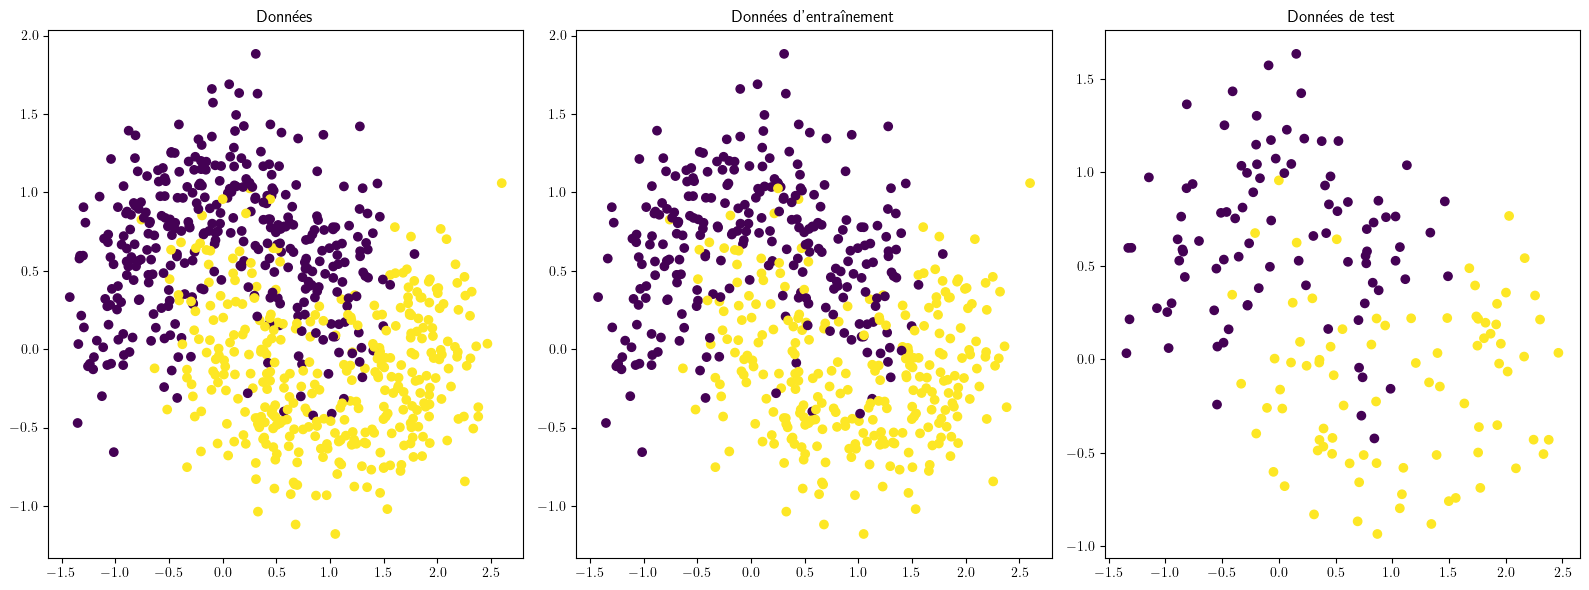

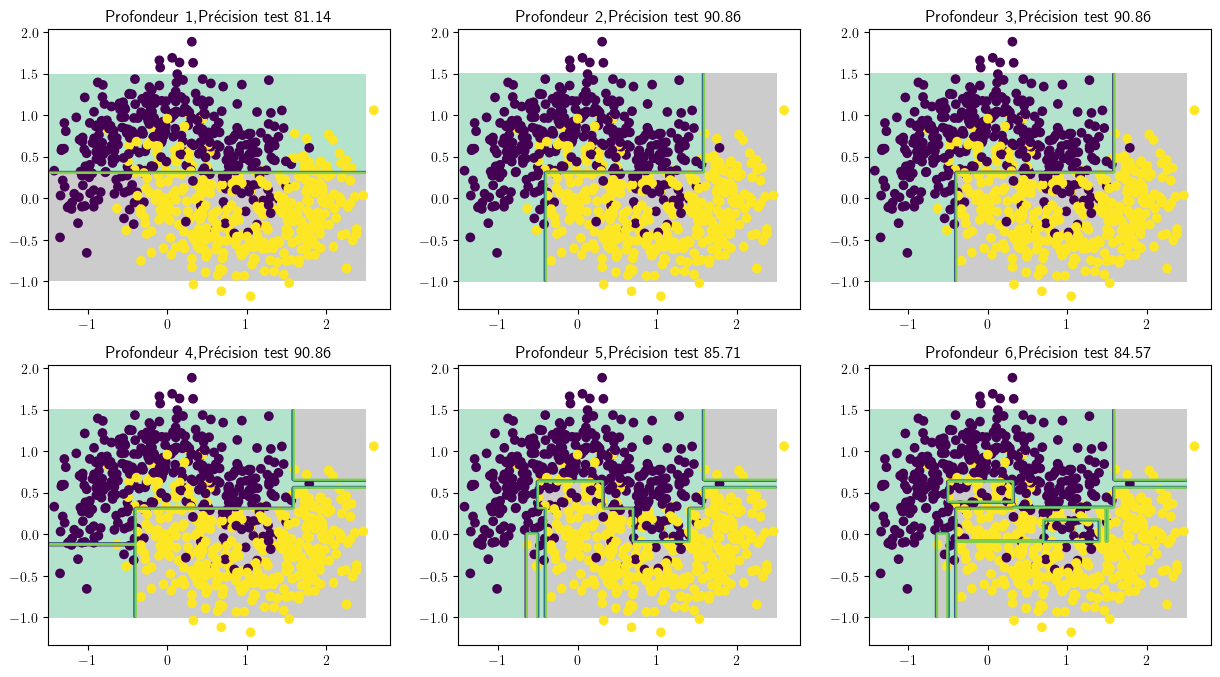

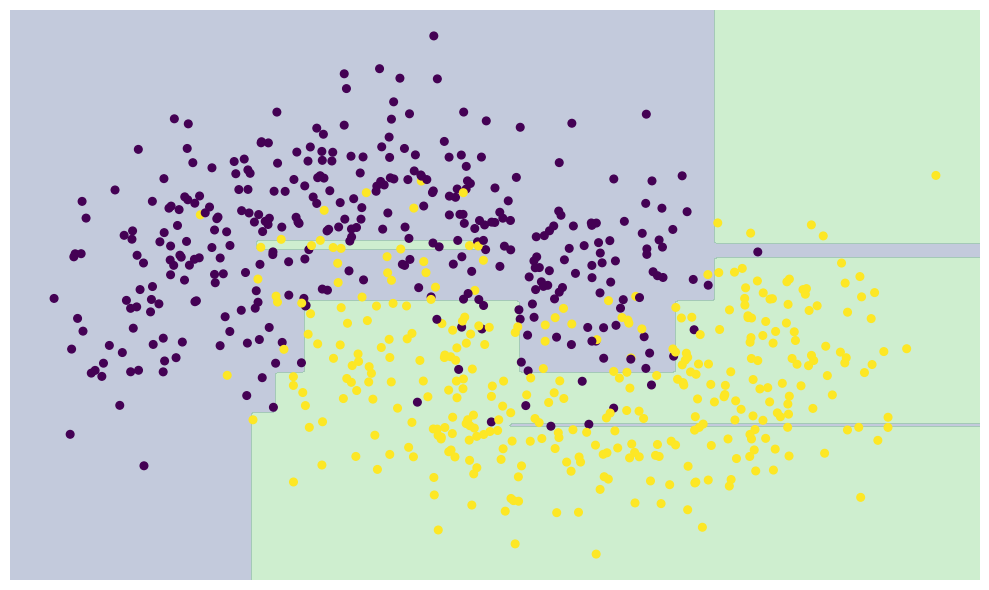

In [7]:
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib import rc
rc('text', usetex=True)


# Données
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=700, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
plt.figure(figsize=(16,6))
ax = plt.subplot(1, 3, 1)
ax.set_title("Données")
ax.scatter(X[:, 0], X[:, 1], c=y)
ax = plt.subplot(1, 3, 2)
ax.set_title("Données d'entraînement")
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
ax = plt.subplot(1, 3, 3)
ax.set_title("Données de test",)
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
plt.tight_layout()


def plot_decision_boundary(arbre, X, y,axi,mymap=ListedColormap(['#FF0000', '#00FF00']), axes=[-1.5, 2.5, -1, 1.5], 
                           alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 200)
    x2s = np.linspace(axes[2], axes[3], 200)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = arbre.predict(X_new).reshape(x1.shape)
    axi.contourf(x1, x2, y_pred, alpha=1, cmap='Pastel2')
    if contour:
        axi.contour(x1, x2, y_pred, alpha=0.7)
    axi.scatter(X[:, 0], X[:, 1], c=y)


# Arbre de décision
from sklearn.tree import DecisionTreeClassifier
map = ListedColormap(['#AA0000', '#00AA00','#0000AA','#00AAAA'])

fig, ax = plt.subplots(2, 3, figsize=(15, 8))

for axi, depth in zip(ax.flat[0:], range(1, 7)):
        model = DecisionTreeClassifier(max_depth=depth)
        model.fit(X_train,y_train)
        plot_decision_boundary(model, X, y,axi,mymap='Pastel2',contour=True)
        y_pred = model.predict(X_test)
        num_correct_predictions = (y_pred == y_test).sum()
        accuracy = (num_correct_predictions / y_test.shape[0]) * 100        
        axi.set_title('Profondeur {0:d},Précision test {1:.2f}'.format(depth,accuracy))


# Frontière de décision
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, s=30,zorder=3)
plt.axis('off')

model.fit(X, y)
xx, yy = np.meshgrid(np.linspace(*plt.xlim(), num=200),np.linspace(*plt.ylim(), num=200))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
n_classes = len(np.unique(y))
contours = plt.contourf(xx, yy,Z, alpha=0.3,levels=np.arange(n_classes + 1) - 0.5,zorder=1)
plt.tight_layout()
